

# Project: Investigate a Dataset - No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 

The No-show appointments dataset contain information from over one hundered thousand medical appointments in Brazil. The dataset is sourced originally from Kaggle. It shows different information which can help to determine the reasons patients will show or not show up for their medical appoitments. The column names in the dataset and their significance are listed below:

1. PatientID - patient identification
2. AppointmentID - appointment identification
3. Gender- female or male
4. Scheduled Day - The day the patient called to set up an appointment.
5. Appointment Day - The day they have to see the doctor.
6. Age- How old the patient is.
7. Neighbourhood - The place the appointment will take place.
8. Scholarship - Does the patient have medical welfare? True or False
9. Hipertension - Is the patient hypertensive? True or False
10. Diabetes - Is the patient diabetic? True or False
11. Alcoholism -Is the patient an alcoholic ? True or False.
12. Handcap - Does the patient have any disability? the number provided indicates the number of disability.
13. SMS_received - Was a message sent to the patient? True or False
14. No_show - Did the patient show up for appointment? Yes or No.


### Question(s) for Analysis
The following questions are meant to be answered after the analysis;

1. Does the age affect the rate at which patients show up?
2. Are patients who received SMS likely to show up more than patients who do not receive?
3. Do their gender have to do with showing up?
4. Does having scholarship determine if they will miss or show up for appointment?


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [18]:
def categorise_range(dataframe, column_to_split, range_gap, new_column_name):
    '''This function helps to categorise a column into different range
       arg: dataframe: dataframe)
                   this is the dataframe that holds the column that will be splitted
            column_to_split: string
                   this is the column that will be splitted into ranges
            range_gap : int
                   this is the diffence between the range values
            new_column_name : string
                    this is the new column 
       return:  series
    '''
  
    mybins = range(0, dataframe[column_to_split].max(), range_gap)

  # Cut the data with the help of the bins
    dataframe[new_column_name] = pd.cut(dataframe[column_to_split], bins=mybins)

  # Count the number of values per Age_range
    return dataframe[new_column_name].value_counts()

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.8MB/s eta 0:00:01    95% |██████████████████████████████▌ | 10.0MB 30.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01   12% |████                            | 1.7MB 25.3MB/s eta 0:00:01    32% |██████████▌                     | 4.4MB 28.8MB/s eta 0:00:01    42% |█████████████▊                  | 5.7MB 28.6MB/s eta 0:00:01    52% |█████████████████               | 7.1MB 28.0MB/s eta 0:00:01    82% |██████████████████████████▎     | 11.0MB 26.4MB/s eta 0:00:01    91% |█████████████████████████████▍  | 12.3MB 27.3MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


# <a id='wrangling'></a>
## Data Wrangling




### General Properties


In [5]:
df_appt = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_appt.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df_appt.shape

(110527, 14)

The data contains 110527 rows and 14 columns

In [7]:
df_appt.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [8]:
df_appt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


float, integer and object (string) are the data types of our features. From here we could see that there are no missing values as all the columns have 110527 entries which is the same as the number of rows shown in the shape attribute.

In [9]:
df_appt.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The dataset has 110527 rows and 14 columns. There is no missing data and no duplicated data. 50% of the patients are 37 years old, the oldest being 115 years.

In [10]:
df_appt.describe(include=['object', 'bool'])

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


Majority of the patients are female (71840) and there are 81 neighbourhood in all with JARDIM CAMBURI occurring frequently that means 7717 of the patients are scheduled to hav their appointment at JARDIM CAMBURI.Most of the patients did not show up for their appointment about 88208 of them.

# Data Cleaning

The patient ID and Appointment ID will not be used, therefore both will be dropped.

The minimum value for age is -1 which is not valid, the row will be dropped.

The schedueledDay and AppointmentDay columns have the incorrect data type these will be corrected to datetime type.

No-show will be renamed as No_show so that the names will be uniform and easy to work with.
 

In [11]:
#drop PatientID and AppointmentID

df_appt.drop(df_appt.columns[[0,1]], axis =1, inplace= True)
df_appt.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


The PatientID and AppointmentID columns were deopped using the drop function by passing the index of the column and indicating that it is column we want to drop with the argument (axis =1) because, they are not needed for analysis

In [12]:
#drop the row with age -1

df_appt.drop(df_appt[(df_appt['Age']< 0)].index, inplace = True)
df_appt['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

the row that has age -1 which appears to be a mistake because there is no human being with a negative age was dropped using the drop function.

In [13]:
# Correct ScheduledDay data type to datetime datatype
df_appt['ScheduledDay'] = pd.to_datetime(df_appt['ScheduledDay'])
df_appt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  object             
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  No-show         110526 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(4)
memory usage: 11.0+ MB


ScheduleDay shows the date that the patient called to book appointment, therefore the data type should be datetime and not string. the column data type was changed using a panda function (pd.to_daframe())

In [14]:
df_appt['AppointmentDay'] = pd.to_datetime(df_appt['AppointmentDay'])
df_appt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  No-show         110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


AppointmentDay shows the date that the patient called to book appointment, therefore the data type should be datetime and not string. the column data type was changed using a panda function (pd.to_daframe())

In [15]:
# Rename No-show to No_show
df_appt.rename(columns = {'No-show' : 'No_show'}, inplace = True)
df_appt.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


No-show was changed to No_show by using rename function and passing the old name first with column and writing the new name. This was done to make the name to be easier to work with

# <a id='eda'></a>
## Exploratory Data Analysis







Text(0.5, 1.0, 'Graphical representation of the dataset')

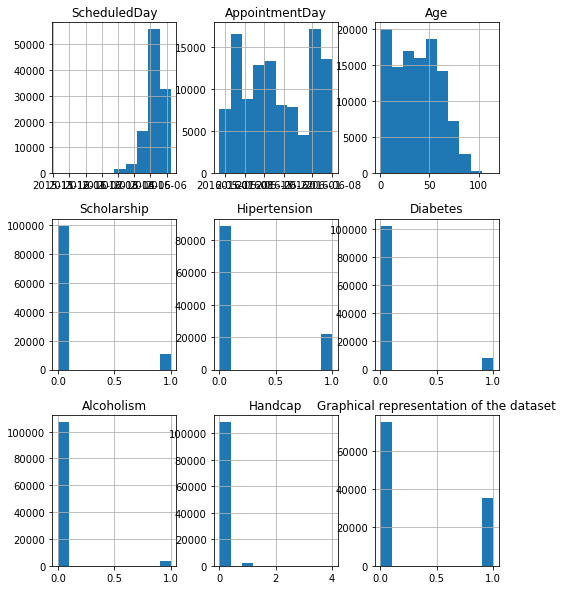

In [17]:
df_appt.hist(figsize=(8,10))
plt.title('Graphical representation of the dataset')

In [19]:

Showed_up = df_appt[df_appt['No_show'] == 'Yes']
Absent = df_appt[df_appt['No_show'] == 'No']
 

In [20]:
columns_explore = ['Age', 'Scholarship', 'Gender', 'SMS_received']

df_appt.groupby(['No_show'])[columns_explore].describe(percentiles = [])

Age                                         Scholarship  \
           count       mean        std  min   50%    max       count   
No_show                                                                
No       88207.0  37.790504  23.338645  0.0  38.0  115.0     88207.0   
Yes      22319.0  34.317667  21.965941  0.0  33.0  115.0     22319.0   

                                           SMS_received                      \
             mean       std  min  50%  max        count      mean       std   
No_show                                                                       
No       0.093904  0.291697  0.0  0.0  1.0      88207.0  0.291337  0.454381   
Yes      0.115507  0.319640  0.0  0.0  1.0      22319.0  0.438371  0.496198   

                        
         min  50%  max  
No_show                 
No       0.0  0.0  1.0  
Yes      0.0  0.0  1.0

The table above gives a summary of the number of patients that kept and missed their appointments in relation to the question asked. I observed that the count of patients that missed their appointment is the same across the columns, this is also the same for people that kept their appointment.


### Research Question 1 (Does age affect their showing up for appointments ?)

Text(0, 0.5, 'Count')

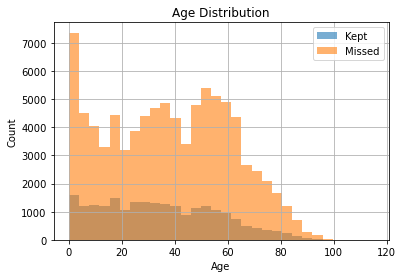

In [21]:
Showed_up['Age'].hist(alpha= 0.6, bins =30, label='Kept')
Absent['Age'].hist(alpha= 0.6, bins =30, label='Missed')
plt.legend()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

In [22]:

Age_range_split = categorise_range(df_appt, 'Age', 10, 'Age_range')
Age_range_split

(50, 60]      15661
(0, 10]       15210
(30, 40]      15052
(40, 50]      14420
(20, 30]      13783
(10, 20]      13099
(60, 70]      11189
(70, 80]       5721
(80, 90]       2544
(90, 100]       301
(100, 110]        2
Name: Age_range, dtype: int64

In [23]:
pd.crosstab(df_appt['No_show'], df_appt['Age_range'])

Age_range,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]","(100, 110]"
No_show,,,,,,,,,,,
No,12061,9791,10389,11820,11550,12940,9541,4832,2137,242,2
Yes,3149,3308,3394,3232,2870,2721,1648,889,407,59,0


Text(0.5, 1.0, 'Distribution of Age Range')

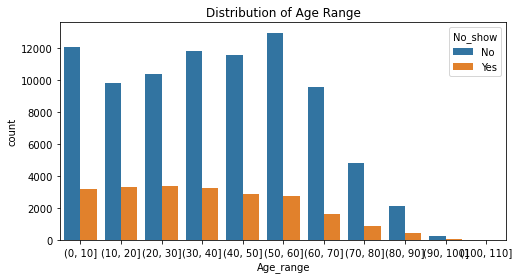

In [25]:
plt.figure(figsize=(8,4))
age = sns.countplot(x='Age_range', hue='No_show', data=df_appt);
plt.title('Distribution of Age Range')

The mean age of patients who kept their appointments is 37 years while that of patients who missed their appointments is 34 years. From the plot of age range, it is seen that patients in age range of 20-30 has the highest number of patients who kept their appointment. we can say that generally, patients within 0-40 years and 100-110 years kept their appointment more than other age range.

# Research Question 2  (Does receiving Sms determine showing up for appointments)

In [27]:
pd.crosstab(df_appt['No_show'], df_appt['SMS_received'])

SMS_received,0,1
No_show,,
No,62509,25698
Yes,12535,9784


Text(0.5, 1.0, 'Count of No_show against SMS_received')

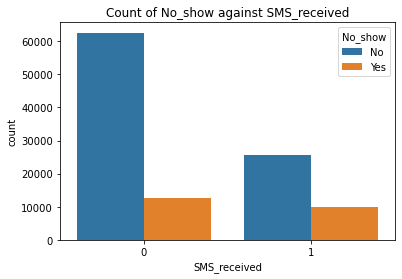

In [29]:
sns.countplot(x='SMS_received', hue='No_show', data=df_appt);
plt.title('Count of No_show against SMS_received')

Majority of the patients did not receive SMS. The number of patients that did not receive SMS and still kept their appointment is more than those who received and kept their appointment. This means that receiving SMS is not a guarantee that patients will keep their appointment.

# Research Question 3 (What is the relationship between gender and showing up for appointment ?)¶

Text(0.5, 1.0, 'Distribution of patients who kept appointment based on gender')

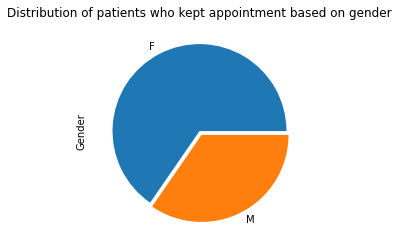

In [35]:
Showed_up['Gender'].value_counts().plot(kind ='pie', explode = (0, .05))
plt.title('Distribution of patients who kept appointment based on gender')

Text(0.5, 1.0, 'Distribution of patients who missed appointment based on gender')

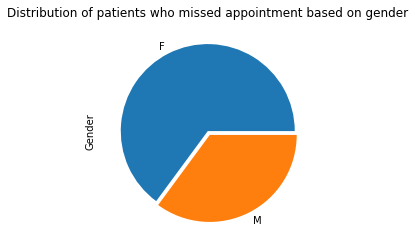

In [34]:
Absent['Gender'].value_counts().plot(kind ='pie', explode = (0, .05))
plt.title('Distribution of patients who missed appointment based on gender')

 From the pie chart, the difference in gender distibution between the patients who missed and kept appointment is small. The chart looks almost the same.

In [36]:
pd.crosstab(df_appt['No_show'], df_appt['Gender'])

Gender,F,M
No_show,,
No,57245,30962
Yes,14594,7725


Text(0.5, 1.0, 'Count of No_show against Gender')

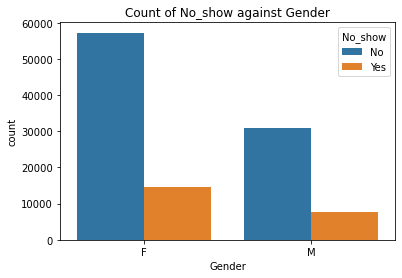

In [37]:
sns.countplot(x='Gender', hue='No_show', data=df_appt);
plt.title('Count of No_show against Gender')

More female kept their appointment than female, though we cannot specifically say that this is a determining factor.

# Research Question 4 (Does having scholarship determine if they will miss or show up for appointment?)

In [38]:
pd.crosstab(df_appt['No_show'], df_appt['Scholarship'])


Scholarship,0,1
No_show,,
No,79924,8283
Yes,19741,2578


Text(0.5, 1.0, 'Count of No_show against Scholarship')

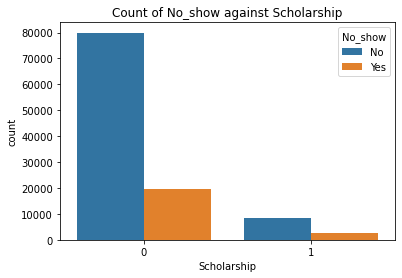

In [39]:
sns.countplot(x='Scholarship', hue='No_show', data=df_appt);
plt.title('Count of No_show against Scholarship')

 The number of people with scholarship is very small compared to the entire number of patients. If the value is compared with that of people without scholarship, we can infer that having scholarship does not ascertain that patients will show up for appointments.

# <a id='conclusions'></a>
## Conclusions

Patients within the average age of 37 years old show up more for appointment than other age group and showing up also reduce with increase in age.

Patients without welfare show up for appointment more than patients with scholarship (welfare). 

The gender of the patient cannot tell whether they will show up for appointment or not.

Majority of the patients did not receive SMS. The number of patients that did not receive SMS and still kept their appointment is more than those who received and kept their appointment. This means that receiving SMS is not a guarantee that patients will keep their appointment.

Further Stastiscal analysis can be carried on this data to further ascertain the results from this analysis.

Limitation

 The details provided are limited and so conclusion to reason for showing up or not is difficult to make.


